In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/zhr47/opt/anaconda3/envs/PythonML2/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [4]:
# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

model = LinearRegression()


In [5]:
df = pd.read_csv("data/simple_data_for_ML.csv")
df

,Unnamed: 0,id,host_is_superhost,host_identity_verified,bedrooms,beds,accommodates,latitude,longitude,number_of_reviews,review_scores_rating,reviews_per_month,amenities_count,host_listings_count,instant_bookable,reviews_per_month.1,price
0,0,2818,1,1,1.0,2.0,2,52.36575,4.94142,278,98.0,1.98,25,1.0,1,1.98,$59.00
1,1,20168,0,1,1.0,1.0,2,52.36424,4.89396,340,89.0,2.63,16,2.0,1,2.63,$236.00
2,2,25428,1,0,1.0,1.0,3,52.37297,4.88339,5,100.0,0.15,28,2.0,0,0.15,$125.00
3,3,27886,1,1,1.0,1.0,2,52.38761,4.89188,219,99.0,2.05,23,1.0,1,2.05,$138.00
4,4,28871,1,1,1.0,1.0,2,52.36719,4.89092,336,97.0,2.72,14,2.0,0,2.72,$75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,18777,45761390,0,1,1.0,2.0,4,52.37642,4.84941,0,0.0,0.00,8,892.0,1,0.00,$137.00
18778,18778,45763935,0,0,2.0,0.0,1,52.39042,4.88204,0,0.0,0.00,10,2.0,0,0.00,$120.00
18779,18779,45776325,0,0,1.0,1.0,2,52.34306,4.89995,0,0.0,0.00,19,3.0,0,0.00,$20.00
18780,18780,45777642,0,0,1.0,0.0,2,52.34885,4.91878,0,0.0,0.00,8,0.0,0,0.00,$33.00


In [6]:
df.price = df.price.str[1:-4]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')
df = df.loc[df.price < 1000]
df.head()

,Unnamed: 0,id,host_is_superhost,host_identity_verified,bedrooms,beds,accommodates,latitude,longitude,number_of_reviews,review_scores_rating,reviews_per_month,amenities_count,host_listings_count,instant_bookable,reviews_per_month.1,price
0,0,2818,1,1,1.0,2.0,2,52.36575,4.94142,278,98.0,1.98,25,1.0,1,1.98,59
1,1,20168,0,1,1.0,1.0,2,52.36424,4.89396,340,89.0,2.63,16,2.0,1,2.63,236
2,2,25428,1,0,1.0,1.0,3,52.37297,4.88339,5,100.0,0.15,28,2.0,0,0.15,125
3,3,27886,1,1,1.0,1.0,2,52.38761,4.89188,219,99.0,2.05,23,1.0,1,2.05,138
4,4,28871,1,1,1.0,1.0,2,52.36719,4.89092,336,97.0,2.72,14,2.0,0,2.72,75


In [ ]:
#df.price = df.price.str.replace("$", "")
#df.price = df.price.str.replace(",", "")
#df.price = df.price.str.replace(".", "")
#df.price = df.price.astype('int64')

This section the first regression

In [ ]:
#########################

In [ ]:
X = df[['bedrooms','beds','accommodates']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
model.fit(X_train, y_train)
training_score1 = model.score(X_train, y_train)
testing_score1 = model.score(X_test, y_test)

print(f"Frist Training Score: {training_score1}")
print(f"First Testing Score: {testing_score1}")

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("First Residual Plot")
plt.savefig("images/First_plt.jpg", dpi=1000)

In [ ]:
#########################

The Second Regression

In [ ]:
#########################

In [ ]:
X = df[['bedrooms','beds','accommodates',
        'number_of_reviews']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
model.fit(X_train, y_train)
training_score2 = model.score(X_train, y_train)
testing_score2 = model.score(X_test, y_test)

print(f"Second Training Score: {training_score2}")
print(f"Second Testing Score: {testing_score2}")

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Second Residual Plot")
plt.savefig("images/Second_plt.jpg", dpi=1000)

In [ ]:
#########################

The Third Regression

In [ ]:
#########################

In [ ]:
X = df[['bedrooms','beds','accommodates',
        'latitude', 'longitude',
        'number_of_reviews',
        'review_scores_rating',
        'host_is_superhost']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
model.fit(X_train, y_train)
training_score3 = model.score(X_train, y_train)
testing_score3 = model.score(X_test, y_test)

print(f"Third Training Score: {training_score3}")
print(f"Third Testing Score: {testing_score3}")

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Third Residual Plot")
plt.savefig("images/Third_plt.jpg", dpi=1000)

In [ ]:
#########################

In [ ]:
#########################

In [38]:
X = df[['bedrooms','beds','accommodates',
        'latitude', 'longitude',
        'number_of_reviews',
        'review_scores_rating',
        'host_identity_verified',
        'host_is_superhost',
        'reviews_per_month',
        ]]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

(18744, 10) (18744, 1)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [40]:
model.fit(X_train, y_train)
training_score4 = model.score(X_train, y_train)
testing_score4 = model.score(X_test, y_test)

print(f"Fourth Training Score: {training_score4}")
print(f"Fourth Testing Score: {testing_score4}")

Fourth Training Score: 0.26491936926410997
Fourth Testing Score: 0.25598161841469647


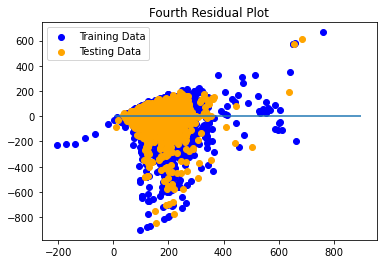

In [41]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Fourth Residual Plot")
plt.savefig("images/Fourth_plt.jpg", dpi=1000)

In [ ]:
#########################

The Fifth Regression

In [ ]:
#########################

In [55]:
X = df[['id','bedrooms','beds','accommodates',
        'latitude', 'longitude',
        'number_of_reviews',
        'review_scores_rating',
        'host_identity_verified',
        'host_is_superhost',
        'reviews_per_month',
        'host_listings_count',
        'amenities_count',
        'instant_bookable',
        'reviews_per_month']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

(18744, 13) (18744, 1)


In [56]:
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(X,y, random_state = 42)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [58]:
X_train = X_train.drop("id", axis=1)
X_test = X_test.drop("id", axis=1) 

#y_train = y_train_og.drop("id", axis=1)
#y_test = y_test_og.drop("id", axis=1)

In [59]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [60]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [61]:
#X_scaler = StandardScaler().fit(X_train)

In [62]:
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [63]:
model.fit(X_train, y_train)
training_score5 = model.score(X_train, y_train)
testing_score5 = model.score(X_test, y_test)

print(f"Fifth Training Score: {training_score5}")
print(f"Fifth Testing Score: {testing_score5}")

Fifth Training Score: 0.2840112071171287
Fifth Testing Score: 0.26996671334106304


In [51]:
#model.fit(X_train_scaled, y_train)
#training_score5b = model.score(X_train_scaled, y_train)
#testing_score5b = model.score(X_test_scaled, y_test)

#print(f"Fifth Training Score: {training_score5b}")
#print(f"Fifth Testing Score: {testing_score5b}")

In [52]:
#y_test_p = np.array(list(y_test))
#X_test_p = np.array(model.predict(X_test))

#Predicted_df_test = pd.DataFrame({'Actual': y_test_p.flatten(), 'Predicted': X_test_p.flatten()})
#Predicted_df_test

In [53]:
#y_train_p = np.array(list(y_train))
#X_train_p = np.array(model.predict(X_train))

#Predicted_df_train = pd.DataFrame({'Actual': y_train_p.flatten(), 'Predicted': X_train_p.flatten()})


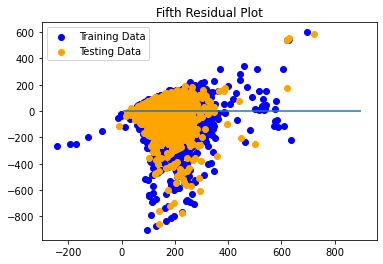

In [54]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Fifth Residual Plot")
plt.savefig("images/Fifth_plt.jpg", dpi=1000)

In [ ]:
#########################

In [ ]:
print(f"Frist Training Score: {training_score1}")
print(f"First Testing Score: {testing_score1}")

In [ ]:
print(f"Second Training Score: {training_score2}")
print(f"Second Testing Score: {testing_score2}")

In [ ]:
print(f"Third Training Score: {training_score3}")
print(f"Third Testing Score: {testing_score3}")

In [ ]:
print(f"Fourth Training Score: {training_score4}")
print(f"Fourth Testing Score: {testing_score4}")

In [ ]:
print(f"Fifth Training Score: {training_score5}")
print(f"Fifth Testing Score: {testing_score5}")

In [ ]:
#########################

In [31]:
model.predict(X_test)

array([[124.29271907],
       [225.19449383],
       [110.79472321],
       ...,
       [218.65051826],
       [226.66032228],
       [119.03432272]])

In [32]:
X_test_og["predicted"] = model.predict(X_test)

/Users/zhr47/opt/anaconda3/envs/PythonML2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
dfnew = X_test_og.copy()

In [34]:
dfnew

,id,bedrooms,beds,accommodates,latitude,longitude,number_of_reviews,review_scores_rating,host_identity_verified,host_is_superhost,reviews_per_month,host_listings_count,amenities_count,instant_bookable,reviews_per_month,predicted
4714,10004773,1.0,1.0,2,52.34640,4.84931,3,93.0,1,0,0.06,1.0,12,0,0.06,124.292719
14328,30545791,2.0,2.0,4,52.36012,4.80655,13,97.0,1,1,0.77,1.0,38,0,0.77,225.194494
18714,45539791,1.0,1.0,2,52.38810,4.91438,0,0.0,1,0,0.00,0.0,5,1,0.00,110.794723
7510,15285356,0.0,2.0,4,52.36516,4.90911,6,92.0,0,0,0.14,1.0,7,0,0.14,133.602259
4939,10582203,4.0,4.0,4,52.35752,4.93545,23,97.0,1,0,0.43,1.0,47,0,0.43,265.962253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8951,18234191,2.0,2.0,4,52.36720,4.86263,21,97.0,1,1,0.53,3.0,7,1,0.53,177.208037
16527,38447036,1.0,1.0,2,52.35102,4.91562,1,100.0,0,0,0.08,0.0,28,1,0.08,138.623273
11027,21676838,3.0,4.0,4,52.41430,4.90755,56,99.0,1,0,1.59,2.0,38,0,1.59,218.650518
11217,21979111,3.0,3.0,4,52.38172,4.88206,3,100.0,1,0,0.09,1.0,29,0,0.09,226.660322


In [35]:
listings = pd.read_csv("data/listings.csv")

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,2.020100e+13,10/11/20,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,2.020100e+13,10/11/20,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,2.020100e+13,10/11/20,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,2.020100e+13,10/10/20,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.05
4,28871,https://www.airbnb.com/rooms/28871,2.020100e+13,10/10/20,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,45761390,https://www.airbnb.com/rooms/45761390,2.020100e+13,10/10/20,Charming 1Room Apartment in Amsterdam,Nice flat in the ground floor in the west area...,NaN,https://a0.muscache.com/pictures/766447f8-1ec7...,310835509,https://www.airbnb.com/users/show/310835509,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
18778,45763935,https://www.airbnb.com/rooms/45763935,2.020100e+13,10/10/20,clean and light apartment nearby the water,Very clean and tidy apartment,NaN,https://a0.muscache.com/pictures/8b4d4ef5-8b9f...,961670,https://www.airbnb.com/users/show/961670,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
18779,45776325,https://www.airbnb.com/rooms/45776325,2.020100e+13,10/13/20,A beautiful spacious room on a central location.,NaN,NaN,https://a0.muscache.com/pictures/4339516f-0f3b...,48168060,https://www.airbnb.com/users/show/48168060,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
18780,45777642,https://www.airbnb.com/rooms/45777642,2.020100e+13,10/13/20,Studio in Amsterdam,Hello!<br />My room is free for 2 weeks Octobe...,NaN,https://a0.muscache.com/pictures/2ef85d3f-9c1e...,75268907,https://www.airbnb.com/users/show/75268907,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [36]:
df_final = pd.merge(listings,dfnew[['id','predicted']], on='id', how = 'inner')

df_final

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,predicted
0,2818,https://www.airbnb.com/rooms/2818,2.020100e+13,10/11/20,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,9.0,10.0,NaN,t,1,0,1,0,1.98,98.110073
1,27886,https://www.airbnb.com/rooms/27886,2.020100e+13,10/10/20,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,NaN,t,1,0,1,0,2.05,102.339113
2,29051,https://www.airbnb.com/rooms/29051,2.020100e+13,10/10/20,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,10.0,9.0,NaN,f,2,0,2,0,4.13,38.597231
3,43109,https://www.airbnb.com/rooms/43109,2.020100e+13,10/14/20,Oasis in the middle of Amsterdam,<b>The space</b><br />Welcome to my beautiful....,You almost can't be more central then this.,https://a0.muscache.com/pictures/241908/ec20bf...,188098,https://www.airbnb.com/users/show/188098,...,10.0,9.0,NaN,f,1,1,0,0,5.03,139.425557
4,50515,https://www.airbnb.com/rooms/50515,2.020100e+13,10/11/20,"Family Home (No drugs, smoking or parties)",This is a beautiful family home in a lovely pa...,Our neighborhood is a lovely part of Amsterdam...,https://a0.muscache.com/pictures/32271278/ccff...,231864,https://www.airbnb.com/users/show/231864,...,9.0,10.0,NaN,f,1,1,0,0,0.22,255.935418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,45673348,https://www.airbnb.com/rooms/45673348,2.020100e+13,10/11/20,Beautiful double room city centre TOP Location,A beautiful room in an apartment on a Unesco-...,"Cafes, restaurants and supermarket are just at...",https://a0.muscache.com/pictures/8f21dce1-daf5...,10389086,https://www.airbnb.com/users/show/10389086,...,NaN,NaN,NaN,t,2,0,2,0,NaN,155.929109
4682,45695711,https://www.airbnb.com/rooms/45695711,2.020100e+13,10/11/20,"Private Triple Room, Euphemia Hotel , city centre",The Euphemia was formerly a monastery built at...,The Fokke Simonszstraat is a quiet street in t...,https://a0.muscache.com/pictures/9e370e49-3354...,367808546,https://www.airbnb.com/users/show/367808546,...,NaN,NaN,NaN,t,5,0,5,0,NaN,147.670025
4683,45747871,https://www.airbnb.com/rooms/45747871,2.020100e+13,10/13/20,Garden view city centre penthouse suite,The fully renewed art deco design bed and brea...,NaN,https://a0.muscache.com/pictures/1854c2e4-266b...,29403408,https://www.airbnb.com/users/show/29403408,...,NaN,NaN,NaN,t,1,0,1,0,NaN,121.809288
4684,45761390,https://www.airbnb.com/rooms/45761390,2.020100e+13,10/10/20,Charming 1Room Apartment in Amsterdam,Nice flat in the ground floor in the west area...,NaN,https://a0.muscache.com/pictures/766447f8-1ec7...,310835509,https://www.airbnb.com/users/show/310835509,...,NaN,NaN,NaN,t,1,1,0,0,NaN,722.045839


In [37]:
df_final.to_csv(r'data/PredictedPrices.csv')